In [144]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import LSTM,Dense,Dropout,Softmax
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
import multiprocessing
import xgboost as xgb
from joblib import parallel_backend
from datetime import timedelta,datetime
import scipy

In [2]:
start=datetime.now()
print(start)
cores=multiprocessing.cpu_count()
tf.config.threading.set_inter_op_parallelism_threads(cores)
tf.config.threading.set_intra_op_parallelism_threads(cores)
cores

2023-11-23 00:12:39.963253


8

In [3]:
df=pd.read_csv('./kddcup99_csv.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [4]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isna().count()

duration                       494020
protocol_type                  494020
service                        494020
flag                           494020
src_bytes                      494020
dst_bytes                      494020
land                           494020
wrong_fragment                 494020
urgent                         494020
hot                            494020
num_failed_logins              494020
logged_in                      494020
lnum_compromised               494020
lroot_shell                    494020
lsu_attempted                  494020
lnum_root                      494020
lnum_file_creations            494020
lnum_shells                    494020
lnum_access_files              494020
lnum_outbound_cmds             494020
is_host_login                  494020
is_guest_login                 494020
count                          494020
srv_count                      494020
serror_rate                    494020
srv_serror_rate                494020
rerror_rate 

In [6]:
df.dtypes=='object'

duration                       False
protocol_type                   True
service                         True
flag                            True
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
lnum_compromised               False
lroot_shell                    False
lsu_attempted                  False
lnum_root                      False
lnum_file_creations            False
lnum_shells                    False
lnum_access_files              False
lnum_outbound_cmds             False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [7]:
df['label'].value_counts()[11:].index

Index(['guess_passwd', 'buffer_overflow', 'land', 'warezmaster', 'imap',
       'rootkit', 'loadmodule', 'ftp_write', 'multihop', 'phf', 'perl', 'spy'],
      dtype='object')

In [8]:
df['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [9]:
lab=df['label'].value_counts()[11:].index
counts=df['label'].value_counts()
lab,counts[11:]

(Index(['guess_passwd', 'buffer_overflow', 'land', 'warezmaster', 'imap',
        'rootkit', 'loadmodule', 'ftp_write', 'multihop', 'phf', 'perl', 'spy'],
       dtype='object'),
 guess_passwd       53
 buffer_overflow    30
 land               21
 warezmaster        20
 imap               12
 rootkit            10
 loadmodule          9
 ftp_write           8
 multihop            7
 phf                 4
 perl                3
 spy                 2
 Name: label, dtype: int64)

In [10]:
for j in range(lab.size):
    df.loc[df['label']==lab[j],'label']='other attacks'
    # print(lab)
df['label'].value_counts()

smurf            280790
neptune          107201
normal            97277
back               2203
satan              1589
ipsweep            1247
portsweep          1040
warezclient        1020
teardrop            979
pod                 264
nmap                231
other attacks       179
Name: label, dtype: int64

sampler


In [11]:
# _,dx=train_test_split(df,random_state=170,test_size=0.5,stratify=df['label'])
# dx=pd.DataFrame(dx,columns=df.columns)
# _=0

In [12]:
dx=df.copy(deep=True)

In [13]:
dx.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
temp=[]
catenc=dict()
for i in range(dx.columns.size):
    if(dx.dtypes[i]=='object'):
        temp.append(i)
for i in temp:
    enc=tf.keras.layers.StringLookup(output_mode='int')
    enc.adapt(dx[dx.columns[i]])
    dx[dx.columns[i]]=enc(dx[dx.columns[i]]).numpy()
    catenc[i]=enc

In [15]:
catenc[41].get_vocabulary()

['[UNK]',
 'smurf',
 'neptune',
 'normal',
 'back',
 'satan',
 'ipsweep',
 'portsweep',
 'warezclient',
 'teardrop',
 'pod',
 'nmap',
 'other attacks']

In [16]:
temp

[1, 2, 3, 41]

In [17]:
dx

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,2,3,1,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,3
1,0,2,3,1,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,3
2,0,2,3,1,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,3
3,0,2,3,1,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,3
4,0,2,3,1,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,2,3,1,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,3
494016,0,2,3,1,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,3
494017,0,2,3,1,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,3
494018,0,2,3,1,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,3


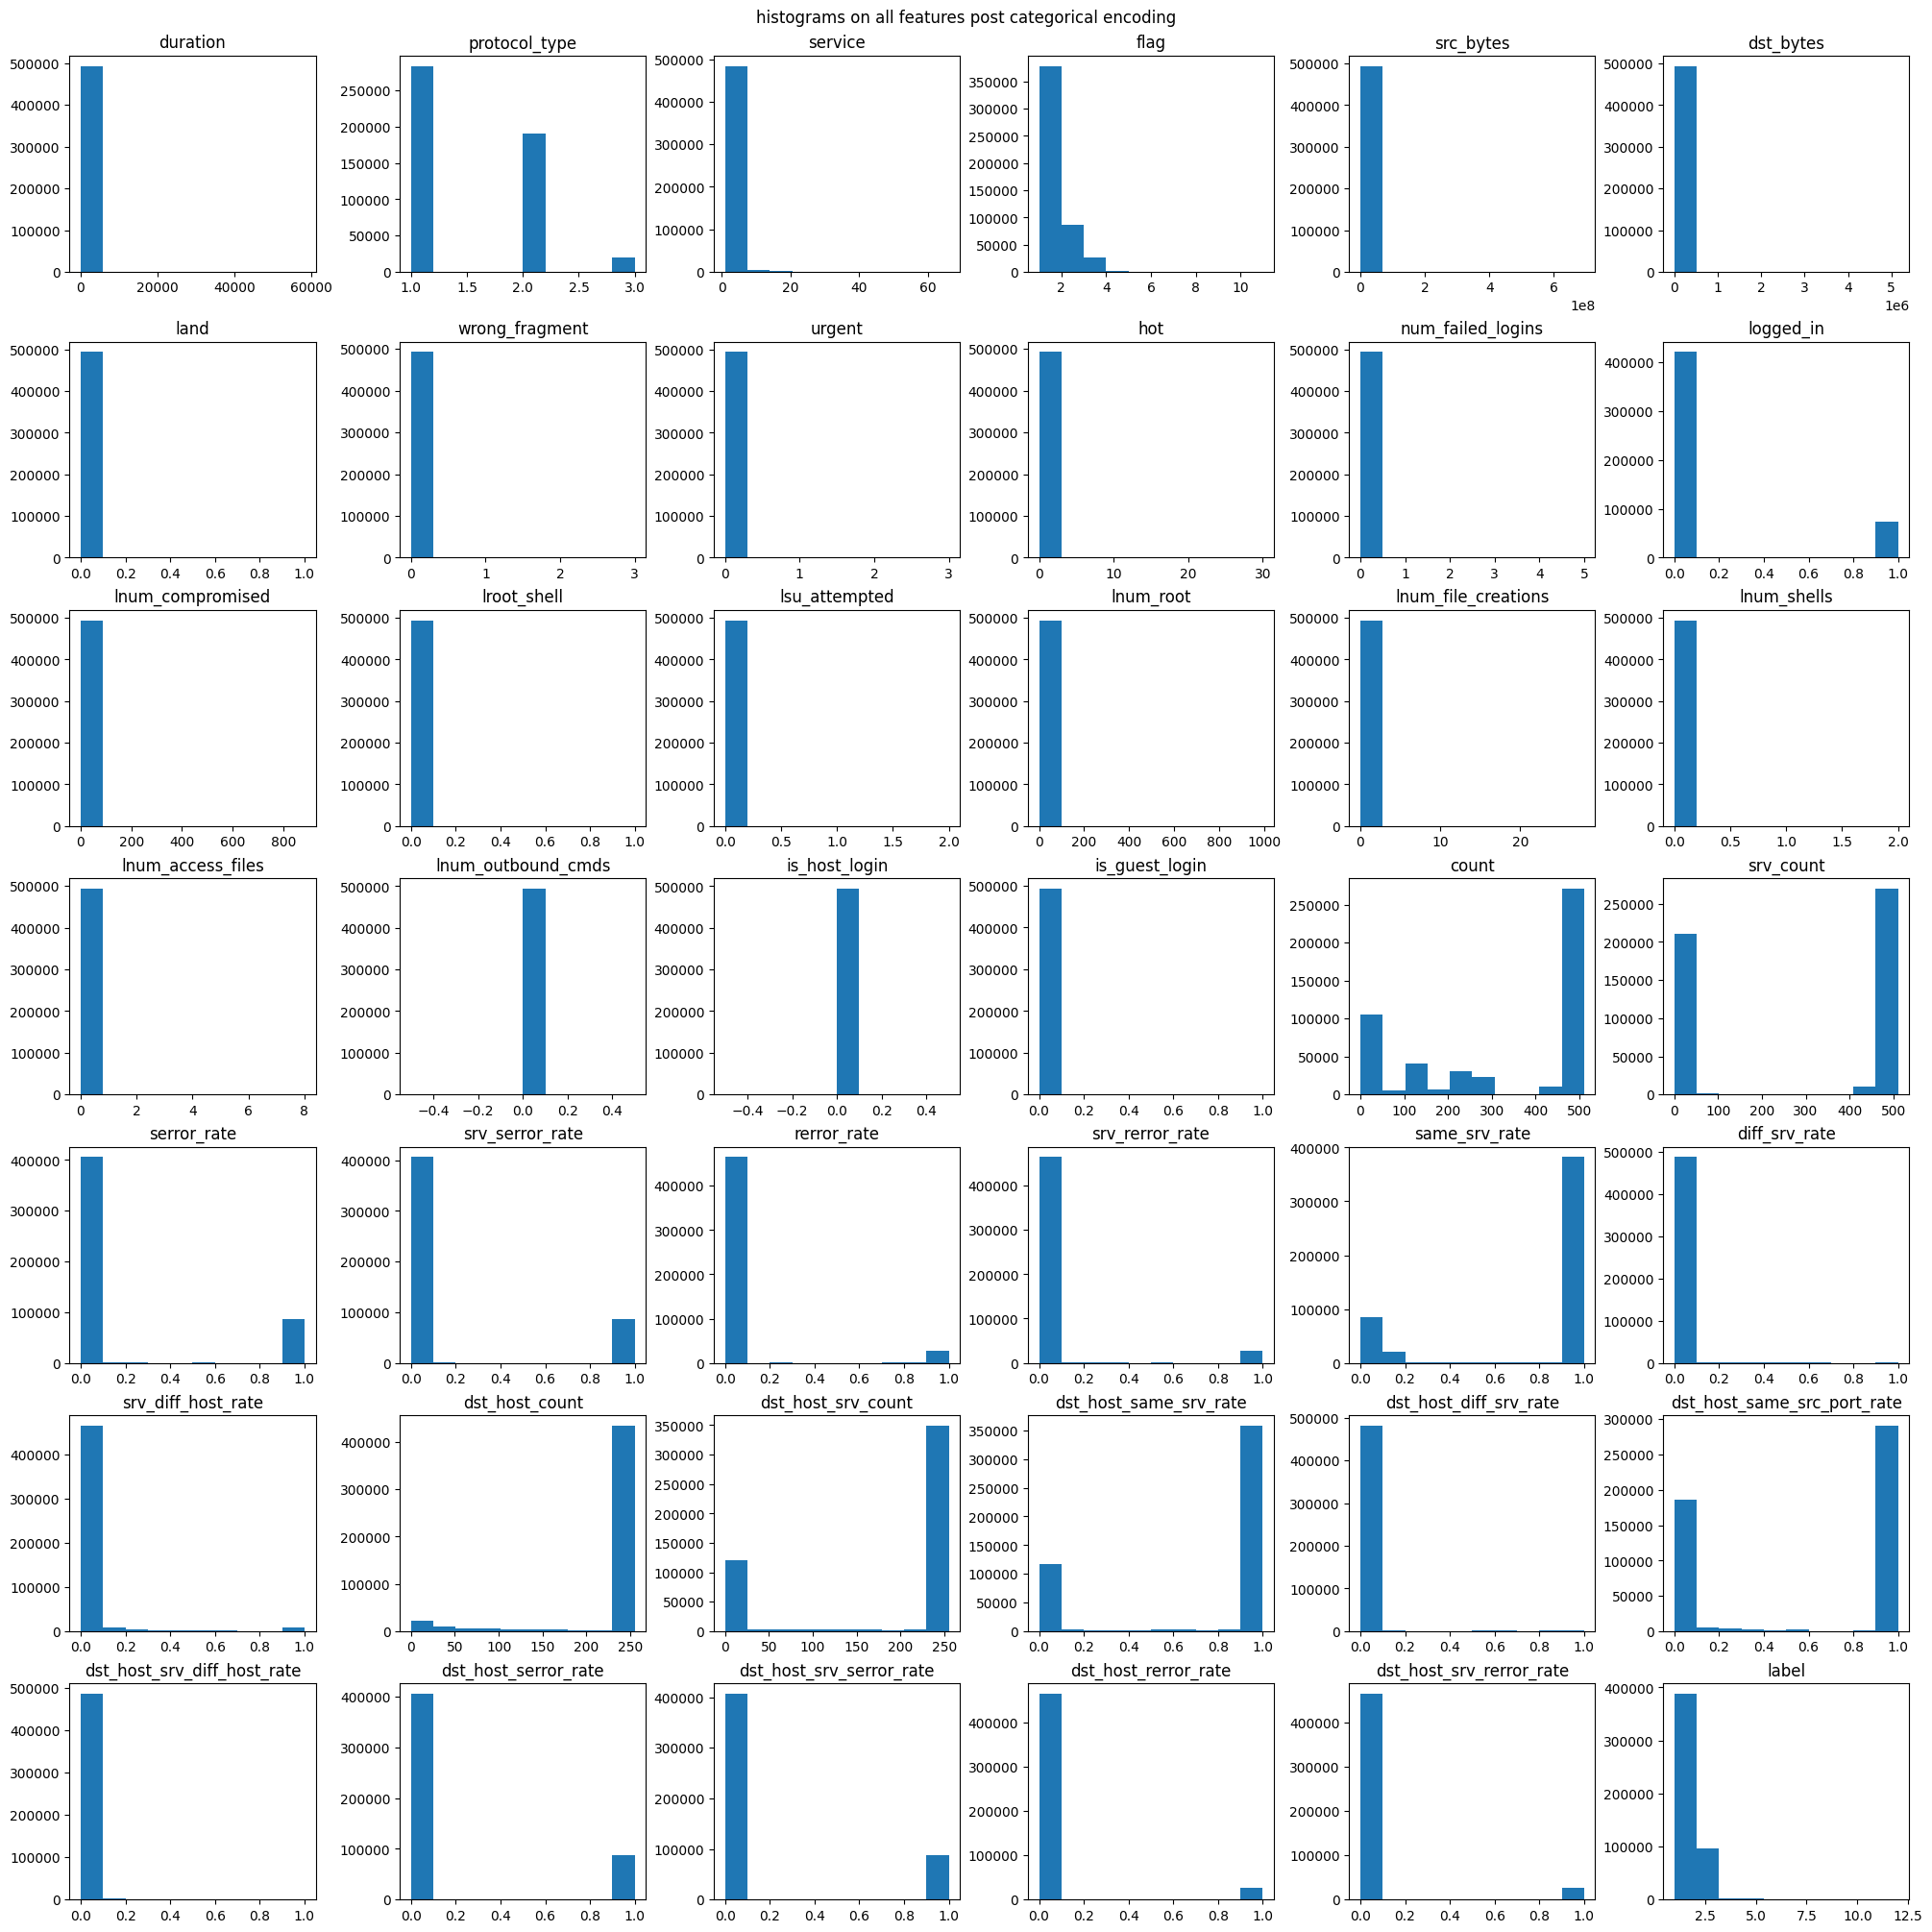

In [18]:
plt.figure(figsize=(20,20),constrained_layout=True)
plt.suptitle('histograms on all features post categorical encoding')
for i in range(df.columns.size):
    plt.subplot(int(df.columns.size/6),int(df.columns.size/7),i+1)
    plt.hist(dx[dx.columns[i]])
    plt.title(dx.columns[i])

In [19]:
norm=tf.keras.layers.Normalization()
norm.adapt(dx.drop(columns=dx.columns[temp],axis=1))
dx[dx.columns.delete(temp)]=norm(dx[dx.columns.delete(temp)]).numpy()

In [20]:
catenc[1].get_vocabulary()

['[UNK]', 'icmp', 'tcp', 'udp']

In [21]:
dx

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.067792,2,3,1,-0.002879,0.138666,-0.006674,-0.047721,-0.002572,-0.044136,...,-1.694366,0.599418,-0.282868,-1.022108,-0.158632,-0.464429,-0.463213,-0.252041,-0.249465,3
1,-0.067792,2,3,1,-0.002820,-0.011578,-0.006674,-0.047721,-0.002572,-0.044136,...,-1.600060,0.599418,-0.282868,-1.146771,-0.158632,-0.464429,-0.463213,-0.252041,-0.249465,3
2,-0.067792,2,3,1,-0.002824,0.014179,-0.006674,-0.047721,-0.002572,-0.044136,...,-1.505753,0.599418,-0.282868,-1.188326,-0.158632,-0.464429,-0.463213,-0.252041,-0.249465,3
3,-0.067792,2,3,1,-0.002840,0.014179,-0.006674,-0.047721,-0.002572,-0.044136,...,-1.411447,0.599418,-0.282868,-1.188326,-0.158632,-0.464429,-0.463213,-0.252041,-0.249465,3
4,-0.067792,2,3,1,-0.002842,0.035215,-0.006674,-0.047721,-0.002572,-0.044136,...,-1.317141,0.599418,-0.282868,-1.209103,-0.158632,-0.464429,-0.463213,-0.252041,-0.249465,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.067792,2,3,1,-0.002748,0.030644,-0.006674,-0.047721,-0.002572,-0.044136,...,0.625573,0.599418,-0.282868,-1.229880,1.028100,-0.464429,-0.436960,-0.252041,-0.249465,3
494016,-0.067792,2,3,1,-0.002776,0.042902,-0.006674,-0.047721,-0.002572,-0.044136,...,0.625573,0.599418,-0.282868,-0.897444,1.028100,-0.464429,-0.436960,-0.252041,-0.249465,3
494017,-0.067792,2,3,1,-0.002856,0.010033,-0.006674,-0.047721,-0.002572,-0.044136,...,0.625573,0.599418,-0.282868,-1.125994,1.028100,-0.306776,-0.436960,-0.252041,-0.249465,3
494018,-0.067792,2,3,1,-0.002767,0.010033,-0.006674,-0.047721,-0.002572,-0.044136,...,0.625573,0.599418,-0.282868,-1.167548,1.028100,-0.359327,-0.436960,-0.252041,-0.249465,3


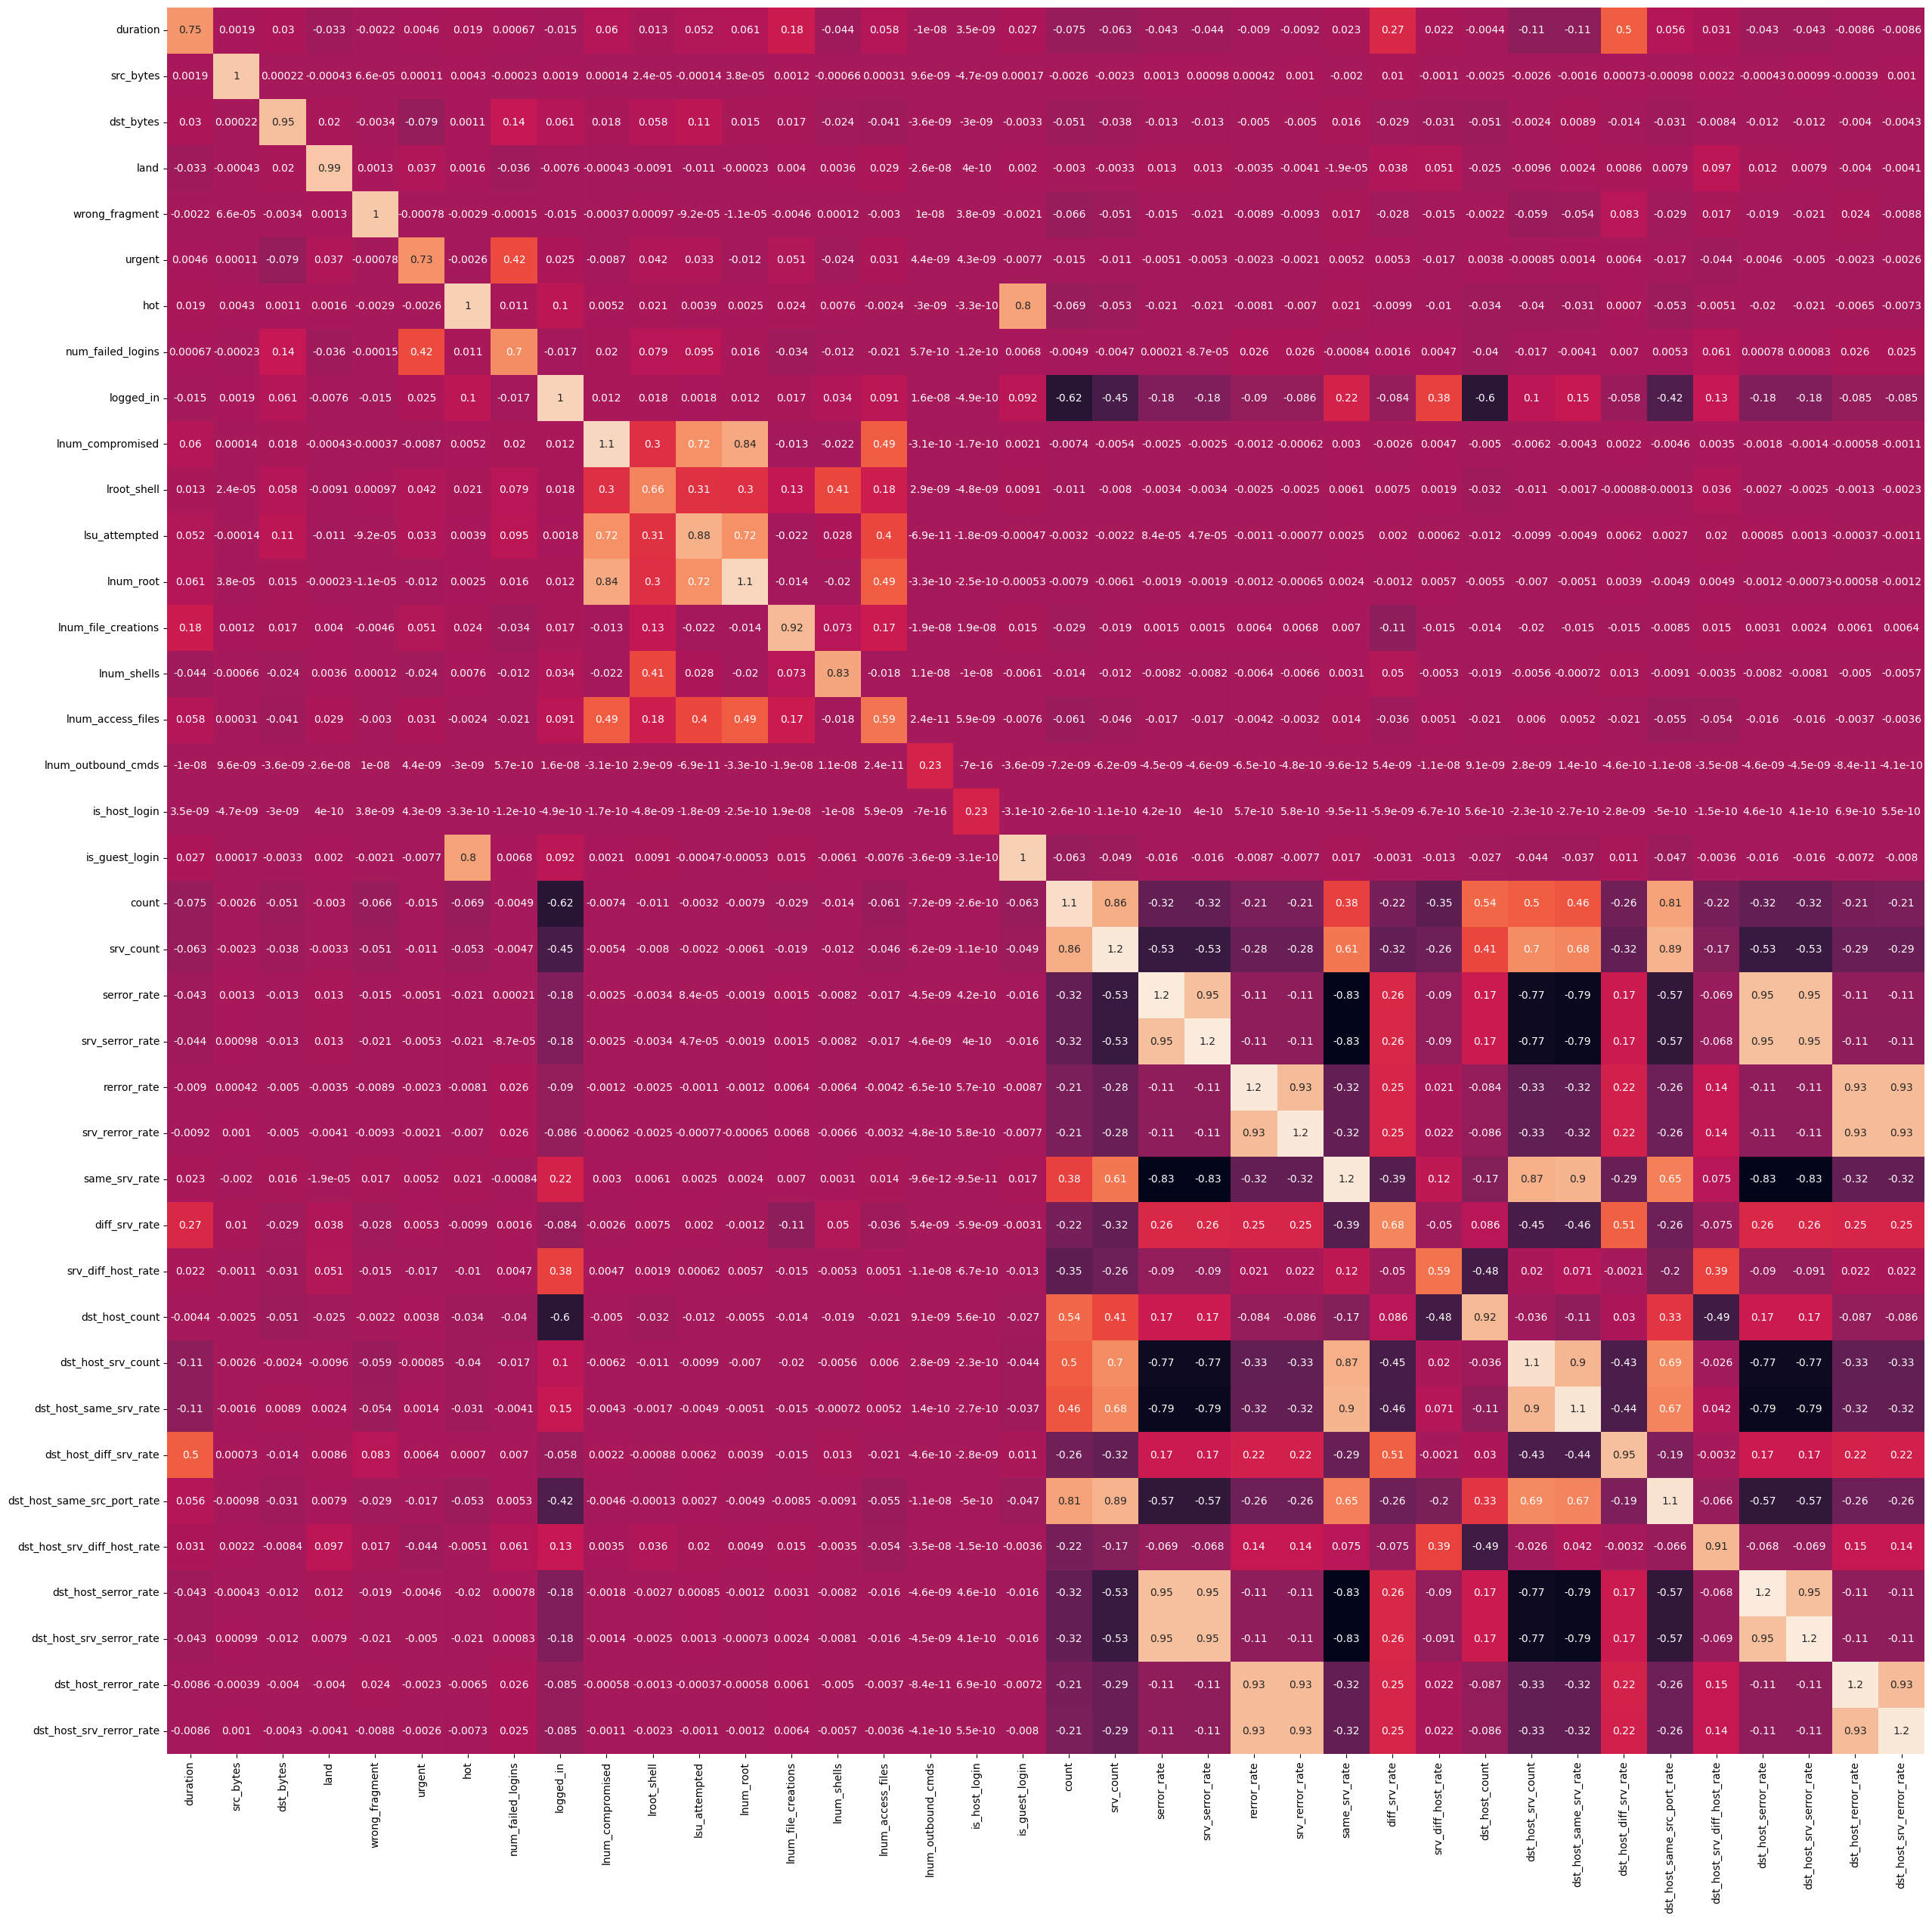

In [22]:
with parallel_backend('threading',n_jobs=-1):
    pc=PCA(n_components=14,random_state=170).fit(dx.drop(columns=dx.columns[temp],axis=1))
    plt.figure(figsize=(30,30))
    _=sns.heatmap(pc.get_covariance(),xticklabels=dx.columns.delete(temp),yticklabels=dx.columns.delete(temp),annot=True,cbar=False)

In [23]:
pc.explained_variance_ratio_.sum()

0.8441548599516399

In [24]:
def reshape_tf(input,dim_req):
    input=np.array(input)
    x=[]
    t=len(input.shape)
    for i in range(t-1):
        x.append(input.shape[i])
    for i in range(dim_req-t):
        x.append(1)
    x.append(input.shape[-1])
    return input.reshape(x)
def reshape_y7(y):    
    return tf.one_hot(y,len(dx['label'].unique()))

In [25]:
len(dx['label'].unique())

12

In [26]:
cols=dx.columns

model data gen

In [27]:
xtr,xte,ytr,yte=train_test_split(dx.drop(columns=['label'],axis=1),dx['label'],random_state=170,shuffle=True,stratify=dx['label'])
xtr,valx,ytr,valy=train_test_split(xtr,ytr,test_size=0.1,random_state=170,stratify=ytr)
xtr.shape,xte.shape,ytr.shape,yte.shape

((333463, 41), (123505, 41), (333463,), (123505,))

for lstm models only

In [28]:
mxtr=reshape_tf(xtr,3)
mxte=reshape_tf(xte,3)
mytr=reshape_y7(ytr)
myte=reshape_y7(yte)
mvalx=reshape_tf(valx,3)
mvaly=reshape_y7(valy)

In [29]:
mxtr.shape

(333463, 1, 41)

In [30]:
tf_batch_size=1024

lstm

add hardmax layer after training tf models to get a single int instead of one hot encoded rep and to feed to stacked classifier after fit

In [31]:
lstmmodel=Sequential()
lstmmodel.add(tf.keras.layers.Input(shape=mxtr.shape[1:],batch_size=tf_batch_size))
lstmmodel.add(LSTM(units=mxtr.shape[1],return_sequences=True))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/2),return_sequences=True))
lstmmodel.add(Dropout(0.2,seed=170))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/2),return_sequences=True))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/4),return_sequences=False))
lstmmodel.add(Dense(units=len(dx['label'].unique())))
lstmmodel.add(Softmax())
expdecay=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.002,
    decay_steps=int(mxtr.shape[0]/100),
    decay_rate=0.999,
    staircase=False,
)
early=tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0,
    start_from_epoch=0,
    restore_best_weights=True,
)
lstmmodel.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=[
        tf.metrics.CategoricalAccuracy(),
        tf.metrics.Precision(),
        tf.metrics.Recall(),
    ],
)

In [32]:
mxtr.shape,mxte.shape

((333463, 1, 41), (123505, 1, 41))

In [33]:
lstmhistory=lstmmodel.fit(
    mxtr,
    mytr,
    batch_size=tf_batch_size,
    use_multiprocessing=True,
    workers=cores,
    epochs=200,
    callbacks=[early],
    validation_data=[mvalx,mvaly],
    validation_batch_size=tf_batch_size,
    shuffle=True,
    verbose=0,
)

In [34]:
res=[]
res.append([
    lstmmodel.evaluate(
        mxtr,
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    lstmmodel.evaluate(
        mxte,
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

121/121 [==============================] - 1s 8ms/step - loss: 0.0160 - categorical_accuracy: 0.9953 - precision: 0.9957 - recall: 0.9954


tf nn

In [37]:
NNmodel=Sequential()
NNmodel.add(tf.keras.layers.Input(shape=dx.shape[1]-1,batch_size=1024))
NNmodel.add(Dense(units=dx.shape[1]))
NNmodel.add(Dense(units=dx.shape[1]*2))
NNmodel.add(Dropout(0.1,seed=170))
NNmodel.add(Dense(units=dx.shape[1]*2))
NNmodel.add(Dense(units=len(dx['label'].unique())))
NNmodel.add(Softmax())
NNmodel.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=[tf.metrics.CategoricalAccuracy(),tf.metrics.Precision(),tf.metrics.Recall()]
)

In [38]:
NNhistory=NNmodel.fit(
    xtr,
    mytr,
    use_multiprocessing=True,
    workers=cores,
    callbacks=[early],
    validation_data=[valx,mvaly],
    validation_batch_size=tf_batch_size,
    batch_size=tf_batch_size,
    epochs=200,
    shuffle=True,
    verbose=0,
)

In [39]:
res.append([
    NNmodel.evaluate(
        xtr,
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    NNmodel.evaluate(
        xte,
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

121/121 [==============================] - 1s 5ms/step - loss: 0.0172 - categorical_accuracy: 0.9972 - precision_1: 0.9973 - recall_1: 0.9973


argmax layer

In [40]:
class argmaxLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(argmaxLayer, self).__init__(**kwargs)
    def call(self, x):
        return tf.argmax(x, axis=-1)
argmax_tf = argmaxLayer()

In [42]:
NNmodel.layers,lstmmodel.layers

([<keras.src.layers.core.dense.Dense at 0x1fd2b927010>,
  <keras.src.layers.activation.softmax.Softmax at 0x1fd2aacf7f0>])

In [43]:
NNmodel.add(argmax_tf)
lstmmodel.add(argmax_tf)
NNmodel.layers,lstmmodel.layers

([<keras.src.layers.core.dense.Dense at 0x1fd2b927010>,
  <__main__.argmaxLayer at 0x1fd2a636b60>])

In [44]:
NNmodel.predict(xte[:2]),lstmmodel.predict(mxte[:2])

1/1 [==============================] - 2s 2s/step


(array([3, 1], dtype=int64), array([3, 1], dtype=int64))

In [45]:
def eval_sklearn_perf(model,yac=yte,xac=xte):
    ypr=model.predict(xac)
    return accuracy_score(yac,ypr)

sklearn models(svm,rf,km,knn,dt)

In [46]:
with parallel_backend('threading',n_jobs=-1):
    svm=SVC(random_state=170,kernel='rbf').fit(xtr,ytr)
    rf=RandomForestClassifier(max_depth=5,random_state=170,n_estimators=dx['label'].unique().size,n_jobs=-1).fit(xtr,ytr)
    knn=KNeighborsClassifier(n_neighbors=1,n_jobs=-1).fit(xtr,ytr)
    dt=DecisionTreeClassifier(random_state=170,max_depth=10).fit(xtr,ytr)

In [47]:
l=[svm,rf,knn,dt]
with parallel_backend('threading',n_jobs=-1):
    for i in l:
        res.append([
            eval_sklearn_perf(i,yac=ytr,xac=xtr),
            eval_sklearn_perf(i),
        ])

xgboost

In [49]:
xgtr=xgb.DMatrix(xtr,label=(ytr-1))
xgte=xgb.DMatrix(xte,label=(yte-1))#-1 due to being 0 indexed
xgbost_model = xgb.train(
    params={
        'objective': 'multi:softmax',
        'num_class': dx['label'].unique().size,
        'max_depth': 5,
        'eta': 0.01,
        'eval_metric': 'mlogloss'  # Evaluation metric
    },
    dtrain=xgtr,
    num_boost_round=100
)

In [50]:
res.append([
    eval_sklearn_perf(xgbost_model,yac=ytr-1,xac=xgtr),
    eval_sklearn_perf(xgbost_model,yac=yte-1,xac=xgte)
])

In [52]:
modList=[]
modList.append(lstmmodel)
modList.append(NNmodel)
modList.append(xgbost_model)
modList.append(knn)
modList.append(svm)
modList.append(rf)
modList.append(dt)

In [55]:
meta=Sequential()
meta.add(tf.keras.layers.Input(shape=[1,len(modList)],batch_size=tf_batch_size))
meta.add(LSTM(units=10))
meta.add(Dense(units=dx['label'].unique().size))
meta.add(Softmax())
meta.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=[
        tf.metrics.CategoricalAccuracy(),
        tf.metrics.Precision(),
        tf.metrics.Recall(),
    ]
)

In [56]:
def gen_op(data):
    mdata=reshape_tf(data,3)
    oplist=[]
    for i in range(len(modList)):
        print(f'running model{i},{modList[i]}')
        if i<1:
            oplist.append(modList[i].predict(mdata,batch_size=tf_batch_size,workers=cores,use_multiprocessing=True))#lstm
        elif i==1:
            oplist.append(modList[i].predict(data,batch_size=tf_batch_size,workers=cores,use_multiprocessing=True))#nn
        elif i==2:
            oplist.append(modList[i].predict(xgb.DMatrix(data))+1)#xgboost is 0 indexed
        else:
            with parallel_backend('threading',n_jobs=-1):
                oplist.append(modList[i].predict(data))#sklearn
        print(f'finsihed generating outputs')
    return np.array(oplist)

# stacked model

input dim:samples,1,no_of_models

input data generated from models(?generate and store vs generate at runtime)

validation data generated from models(?generate and store vs generate at runtime)

super sampling to adjust model to select results when inputs are conflicting(all models need to be established first) due to lack of such data vs data where inputs agree

hardmax to be used after training(done)

In [57]:
te_outputs=[]
te_outputs.append(
    gen_op(xte)
)

running model0,<keras.src.engine.sequential.Sequential object at 0x000001FD2B8F26E0>
121/121 [==============================] - 1s 7ms/step
finsihed generating outputs
running model1,<keras.src.engine.sequential.Sequential object at 0x000001FD2A6355D0>
121/121 [==============================] - 1s 4ms/step
finsihed generating outputs
running model2,<xgboost.core.Booster object at 0x000001FD3A389F90>
finsihed generating outputs
running model3,KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
finsihed generating outputs
running model4,SVC(random_state=170)
finsihed generating outputs
running model5,RandomForestClassifier(max_depth=5, n_estimators=12, n_jobs=-1,
                       random_state=170)
finsihed generating outputs
running model6,DecisionTreeClassifier(max_depth=10, random_state=170)
finsihed generating outputs


In [58]:
tr_outputs=[]
tr_outputs.append(
    gen_op(xtr)
    )

running model0,<keras.src.engine.sequential.Sequential object at 0x000001FD2B8F26E0>


326/326 [==============================] - 3s 8ms/step
finsihed generating outputs
running model1,<keras.src.engine.sequential.Sequential object at 0x000001FD2A6355D0>
326/326 [==============================] - 1s 4ms/step
finsihed generating outputs
running model2,<xgboost.core.Booster object at 0x000001FD3A389F90>
finsihed generating outputs
running model3,KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
finsihed generating outputs
running model4,SVC(random_state=170)
finsihed generating outputs
running model5,RandomForestClassifier(max_depth=5, n_estimators=12, n_jobs=-1,
                       random_state=170)
finsihed generating outputs
running model6,DecisionTreeClassifier(max_depth=10, random_state=170)
finsihed generating outputs


In [59]:
meta_tr=pd.DataFrame(tr_outputs[0]).T
meta_te=pd.DataFrame(te_outputs[0]).T
meta_tr

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
333458,1.0,1.0,1.0,1.0,1.0,1.0,1.0
333459,1.0,1.0,1.0,1.0,1.0,1.0,1.0
333460,1.0,1.0,1.0,1.0,1.0,1.0,1.0
333461,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [60]:
meta_callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=15,restore_best_weights=True)
metahis=meta.fit(
    np.array(np.array(meta_tr).reshape(xtr.shape[0],1,len(modList))),
    mytr,
    batch_size=tf_batch_size,
    use_multiprocessing=True,
    workers=cores,
    epochs=200,
    callbacks=[meta_callback],
    verbose=0
)

In [61]:
meta.layers

In [62]:
np.array(meta_te).reshape(meta_te.shape[0],1,len(modList)).shape

(123505, 1, 7)

In [63]:
res.append([
    meta.evaluate(
        np.array(meta_tr).reshape(meta_tr.shape[0],1,len(modList)),
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    meta.evaluate(
        np.array(meta_te).reshape(meta_te.shape[0],1,len(modList)),
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

121/121 [==============================] - 1s 4ms/step - loss: 0.0101 - categorical_accuracy: 0.9992 - precision_2: 0.9995 - recall_2: 0.9996


In [66]:
meta.add(argmax_tf)

In [67]:
meta.predict(np.array(meta_te).reshape(meta_te.shape[0],1,len(modList))[:10])

1/1 [==============================] - 1s 744ms/step


array([3, 1, 3, 3, 1, 1, 2, 2, 3, 1], dtype=int64)

# voting classifier

In [198]:
def votingClassifier(data,axis=0,):
    return scipy.stats.mode(data,axis=axis).mode

In [199]:
res.append([
    accuracy_score(ytr,votingClassifier(meta_tr,1).reshape(meta_tr.shape[0])),
    accuracy_score(yte,votingClassifier(meta_te,1).reshape(meta_te.shape[0]))
])

C:\Users\Dell\AppData\Local\Temp\ipykernel_1112\1480873025.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(data,axis=axis).mode
C:\Users\Dell\AppData\Local\Temp\ipykernel_1112\1480873025.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

(0.9992952741383602, 0.9991903161815311)

# results

In [181]:
pd.DataFrame(
    res,
    columns=['train','test'],
    index=['lstm','nueral network','support vector machine','random forest','1-nearest-neighbour','decision tree','xgboost','meta lstm','Voting'],
    )

,train,test
lstm,0.995397,0.995288
nueral network,0.997085,0.997158
support vector machine,0.999502,0.999231
random forest,0.993058,0.993182
1-nearest-neighbour,0.999994,0.999547
decision tree,0.997451,0.997506
xgboost,0.999499,0.999336
meta lstm,0.999583,0.999223
Voting,0.999295,0.999190


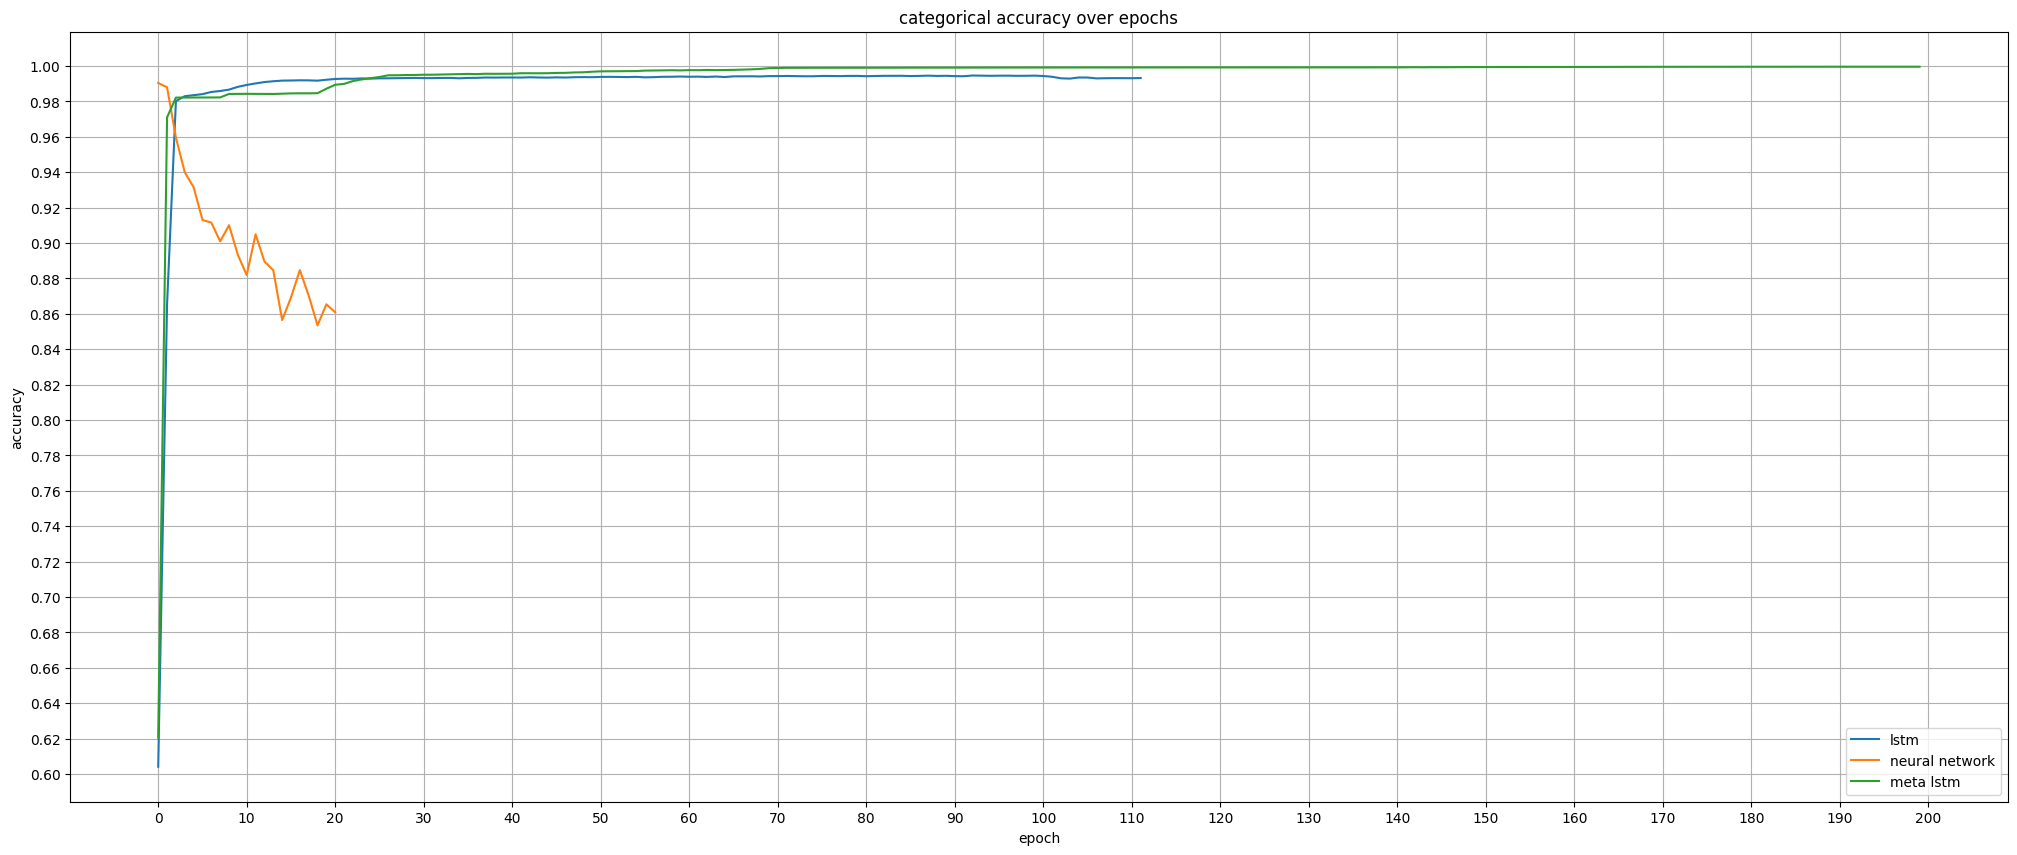

In [216]:
plt.figure(figsize=(25,10))
plt.title('categorical accuracy over epochs')
plt.plot(lstmhistory.history['categorical_accuracy'],label='lstm')
plt.plot(NNhistory.history['categorical_accuracy'],label='neural network')
plt.plot(metahis.history['categorical_accuracy'],label='meta lstm')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.yticks(ticks=np.arange(0.6,1.01,0.02))
plt.xticks(ticks=np.arange(0,201,10))
plt.legend()
plt.grid(True)

In [208]:
end=datetime.now()
f'time taken for notebook execution: {(end-start-timedelta(seconds=4300)).seconds}s'

'time taken for notebook execution: 2754s'